In [14]:
# import the needed libraries  
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
# get the dataset 
dataset = 'D:/Python/projects/CSC-462/xAPI-Edu-Data.csv'
df = pd.read_csv(dataset)

# understand the data
print(df.head())
print(df.info())
print(df.shape)

  gender NationalITy PlaceofBirth     StageID GradeID SectionID Topic  \
0      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
1      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
2      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
3      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
4      M          KW       KuwaIT  lowerlevel    G-04         A    IT   

  Semester Relation  raisedhands  VisITedResources  AnnouncementsView  \
0        F   Father           15                16                  2   
1        F   Father           20                20                  3   
2        F   Father           10                 7                  0   
3        F   Father           30                25                  5   
4        F   Father           40                50                 12   

   Discussion ParentAnsweringSurvey ParentschoolSatisfaction  \
0          20                   Yes                     Go

In [16]:
# check the values of each feature(column)
print(df['gender'].unique())
print(df['NationalITy'].unique())
print(df['PlaceofBirth'].unique())
print(df['StageID'].unique())
print(df['GradeID'].unique())
print(df['SectionID'].unique())
print(df['Topic'].unique())
print(df['Semester'].unique())
print(df['Relation'].unique())
print(df['raisedhands'].unique())
print(df['VisITedResources'].unique())
print(df['AnnouncementsView'].unique())
print(df['Discussion'].unique())
print(df['ParentAnsweringSurvey'].unique())
print(df['ParentschoolSatisfaction'].unique())
print(df['StudentAbsenceDays'].unique())
print(df['Class'].unique())

['M' 'F']
['KW' 'lebanon' 'Egypt' 'SaudiArabia' 'USA' 'Jordan' 'venzuela' 'Iran'
 'Tunis' 'Morocco' 'Syria' 'Palestine' 'Iraq' 'Lybia']
['KuwaIT' 'lebanon' 'Egypt' 'SaudiArabia' 'USA' 'Jordan' 'venzuela' 'Iran'
 'Tunis' 'Morocco' 'Syria' 'Iraq' 'Palestine' 'Lybia']
['lowerlevel' 'MiddleSchool' 'HighSchool']
['G-04' 'G-07' 'G-08' 'G-06' 'G-05' 'G-09' 'G-12' 'G-11' 'G-10' 'G-02']
['A' 'B' 'C']
['IT' 'Math' 'Arabic' 'Science' 'English' 'Quran' 'Spanish' 'French'
 'History' 'Biology' 'Chemistry' 'Geology']
['F' 'S']
['Father' 'Mum']
[ 15  20  10  30  40  42  35  50  12  70  19   5  62  36  55  69  60   2
   0   8  25  75   4  45  14  33   7  13  29  39  49  16  28  27  21  80
  17  65  22  11   1   3 100   6  90  77  24  66  23  82  72  51  85  87
  95  81  53  92  83  67  96  57  73   9  32  52  59  61  79  18  74  97
  41  71  98  78  89  88  86  76  99  84]
[16 20  7 25 50 30 12 10 21 80 88  6  1 14 70 40 13 15 60  0  2 19 85 90
  5 22 11 54 35 33  4 39 75 69  3  8 89 44 92 26 27 29 98 

In [17]:
gender_counts = df.groupby(['Class', 'SectionID']).size().unstack(fill_value=0)

# Print the counts
print(gender_counts)

SectionID    A   B   C
Class                 
H           84  53   5
L           71  48   8
M          128  66  17


In [18]:
gender_counts = df.groupby(['Class', 'Semester']).size().unstack(fill_value=0)

# Print the counts
# tryed it with all features
print(gender_counts)

Semester    F    S
Class             
H          62   80
L          77   50
M         106  105


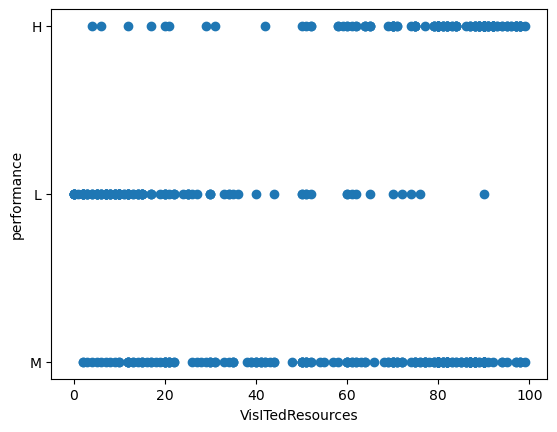

In [19]:
plt.scatter(df['VisITedResources'], df['Class'])
plt.xlabel('VisITedResources')
plt.ylabel('performance')
plt.show()

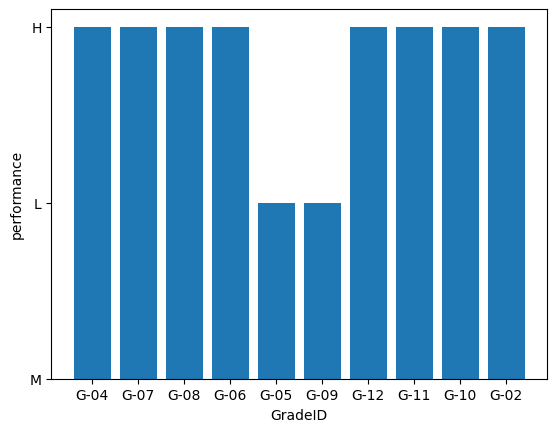

In [20]:
plt.bar(df['GradeID'], df['Class'])
plt.xlabel('GradeID')
plt.ylabel('performance')
plt.show()

In [21]:
# get rid of the features that doesn't effect result and only overburden the model
df = df.drop(['SectionID', 'Semester', 'NationalITy', 'PlaceofBirth', 'StageID', 'Topic'], axis=1)

In [22]:
# turn the object values into increasing integers (0, 1, 2, 3, 4, ...)
mapping = {}

# Loop through each column
for col in df.select_dtypes(include=['object']).columns:

    unique_values = df[col].unique()
    
    column_mapping = {value: index for index, value in enumerate(unique_values)}
    
    mapping[col] = column_mapping


for col, col_mapping in mapping.items():
    df[col] = df[col].map(col_mapping)

In [23]:
# check the values of each feature(column)
print(df['gender'].unique())
print(df['GradeID'].unique())
print(df['Relation'].unique())
print(df['raisedhands'].unique())
print(df['VisITedResources'].unique())
print(df['AnnouncementsView'].unique())
print(df['Discussion'].unique())
print(df['ParentAnsweringSurvey'].unique())
print(df['ParentschoolSatisfaction'].unique())
print(df['StudentAbsenceDays'].unique())
print(df['Class'].unique())

[0 1]
[0 1 2 3 4 5 6 7 8 9]
[0 1]
[ 15  20  10  30  40  42  35  50  12  70  19   5  62  36  55  69  60   2
   0   8  25  75   4  45  14  33   7  13  29  39  49  16  28  27  21  80
  17  65  22  11   1   3 100   6  90  77  24  66  23  82  72  51  85  87
  95  81  53  92  83  67  96  57  73   9  32  52  59  61  79  18  74  97
  41  71  98  78  89  88  86  76  99  84]
[16 20  7 25 50 30 12 10 21 80 88  6  1 14 70 40 13 15 60  0  2 19 85 90
  5 22 11 54 35 33  4 39 75 69  3  8 89 44 92 26 27 29 98  9 42 65 79 55
 63 91 51 58 68 82 72 52 62 71 66 43 95 31 41 81 61 83 84 17 94 48 86 74
 76 97 87 99 34 64 28 38 36 24 59 57 77 18 93 96 78]
[ 2  3  0  5 12 13 15 16 25 30 19 44 22 20 35 36 40 33  4 52 50 10  9  8
 17 26 37  7 28  1 39  6 32 70 18 23 11 29 49 55 38 41 51 95 85 71 98 73
 48 58 93 83 53 63 62 82 72 42 46 77 21 88 66 86 80 56 91 65 76 24 74 59
 79 34 69 89 31 60 54 57 64 87 75 67 43 45 14 78]
[20 25 30 35 50 70 17 22 80 12 11 19 60 66 90 96 99 40 33 43 16  4 88 77
 75  1  5  2  8 13

In [24]:
# split the data
from sklearn.model_selection import train_test_split

X = df.iloc[: , :-1]
y = df.iloc[: , -1:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 53)

In [25]:
from sklearn.linear_model import LinearRegression

model1 = LinearRegression()

model1.fit(X_train, y_train)

LinearRegression()

In [214]:
y_pred1 = model1.predict(X_test)

In [215]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

mae = mean_absolute_error(y_test, y_pred1)
mse = mean_squared_error(y_test, y_pred1)
rmse = np.sqrt(mse)

print(f'MEA = {mae}')
print(f'RMSE = {rmse}')

MEA = 0.7575311901474927
RMSE = 0.8202320992528459


In [27]:
# import the model (Logistic regression)
from sklearn.linear_model import LogisticRegression

model2 = LogisticRegression()

# start training
model2.fit(X_train, y_train)

D:\Anaconda\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
# predicting the test data
y_pred2 = model2.predict(X_test)

In [29]:
# check the results of the model
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score


accuracy = accuracy_score(y_test, y_pred2)
f1 = f1_score(y_test, y_pred2, average='macro')

print(f'accuracy = {accuracy}')
print(f'f1_score = {f1}')

accuracy = 0.75
f1_score = 0.7527095184870071


In [31]:
from sklearn.svm import SVC

model3 = SVC(kernel='linear')

model3.fit(X_train, y_train)

D:\Anaconda\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

In [32]:
y_pred3 = model3.predict(X_test)

In [33]:
accuracy = accuracy_score(y_test, y_pred3)
f1 = f1_score(y_test, y_pred3, average='macro')

print(f'accuracy = {accuracy}')
print(f'f1_score = {f1}')

accuracy = 0.7395833333333334
f1_score = 0.7477565247512964
